In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree
#Program di atas adalah contoh penggunaan beberapa modul dalam pustaka scikit-learn untuk melakukan klasifikasi menggunakan pohon keputusan pada data. 

In [2]:
# Load dataset
df = pd.read_csv('C:/Users/ASUS/Downloads/Crop_Recommendation.csv')
df.head()
#Program ini membantu pengguna untuk memuat dataset yang akan digunakan dalam analisis selanjutnya atau dalam pengembangan model prediktif.

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


In [3]:
# Cek missing values
print(df.isnull().sum())
#rogram ini membantu pengguna untuk mengetahui apakah dataset memiliki nilai yang hilang atau tidak, yang penting untuk diproses sebelum melakukan analisis lebih lanjut atau membangun model prediktif. Dengan mengetahui jumlah dan lokasi nilai yang hilang, pengguna dapat memutuskan langkah-langkah yang tepat untuk mengatasinya, seperti penghapusan baris atau kolom dengan nilai null, atau pengisian nilai null dengan nilai yang sesuai.

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64


In [4]:
# Jika ada missing values, hapus baris yang mengandung missing values
df.dropna(inplace=True)
#Program ini membantu pengguna untuk membersihkan dataset dari baris-baris yang mengandung nilai yang hilang. Dengan menghapus baris-baris ini, pengguna dapat memastikan bahwa dataset yang digunakan untuk analisis atau pemodelan tidak memiliki nilai yang hilang, sehingga menghasilkan hasil yang lebih akurat dan dapat diandalkan. Namun, penghapusan nilai yang hilang harus dilakukan dengan hati-hati dan sesuai dengan konteks data


In [5]:
# Definisikan fitur dan target
X = df.drop('Crop', axis=1)
y = df['Crop']
#Program ini mempersiapkan data untuk pemodelan dengan memisahkan fitur-fitur yang akan digunakan untuk memprediksi target dari target itu sendiri. Dengan cara ini, kita dapat melatih model untuk mempelajari pola di dalam data dan memprediksi nilai target berdasarkan fitur-fitur yang tersedia.


In [6]:
# Membagi data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Program di atas digunakan untuk membagi dataset menjadi set pelatihan (train set) dan set pengujian (test set), sehingga dapat dilakukan evaluasi kinerja model yang telah dilatih.

In [7]:
# Membuat model Decision Tree
model = DecisionTreeClassifier(random_state=42)
#Program di atas digunakan untuk membuat model klasifikasi menggunakan algoritma Decision Tree

In [8]:
# Melatih model
model.fit(X_train, y_train)
#Untuk melatih model menggunakan data pelatihan yang terdiri dari fitur-fitur dan label yang sesuai

DecisionTreeClassifier(random_state=42)

In [9]:
# Prediksi dengan data uji
y_pred = model.predict(X_test)
#Program di atas digunakan untuk melakukan prediksi terhadap data pengujian menggunakan model Decision Tree yang telah dibuat sebelumnya.


In [10]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
#Program ini membantu dalam mengevaluasi kinerja model klasifikasi Decision Tree dengan memberikan informasi tentang seberapa baik model dapat memprediksi kelas dari data pengujian. Dengan mengevaluasi akurasi serta metrik-metrik lainnya


Accuracy: 0.9863636363636363
Classification Report:
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        23
      Banana       1.00      1.00      1.00        21
   Blackgram       0.95      1.00      0.98        20
    ChickPea       1.00      1.00      1.00        26
     Coconut       0.96      1.00      0.98        27
      Coffee       1.00      1.00      1.00        17
      Cotton       1.00      1.00      1.00        17
      Grapes       1.00      1.00      1.00        14
        Jute       0.92      0.96      0.94        23
 KidneyBeans       1.00      1.00      1.00        20
      Lentil       0.92      1.00      0.96        11
       Maize       1.00      0.95      0.98        21
       Mango       1.00      1.00      1.00        19
   MothBeans       1.00      0.92      0.96        24
    MungBean       1.00      1.00      1.00        19
   Muskmelon       1.00      1.00      1.00        17
      Orange       1.00      

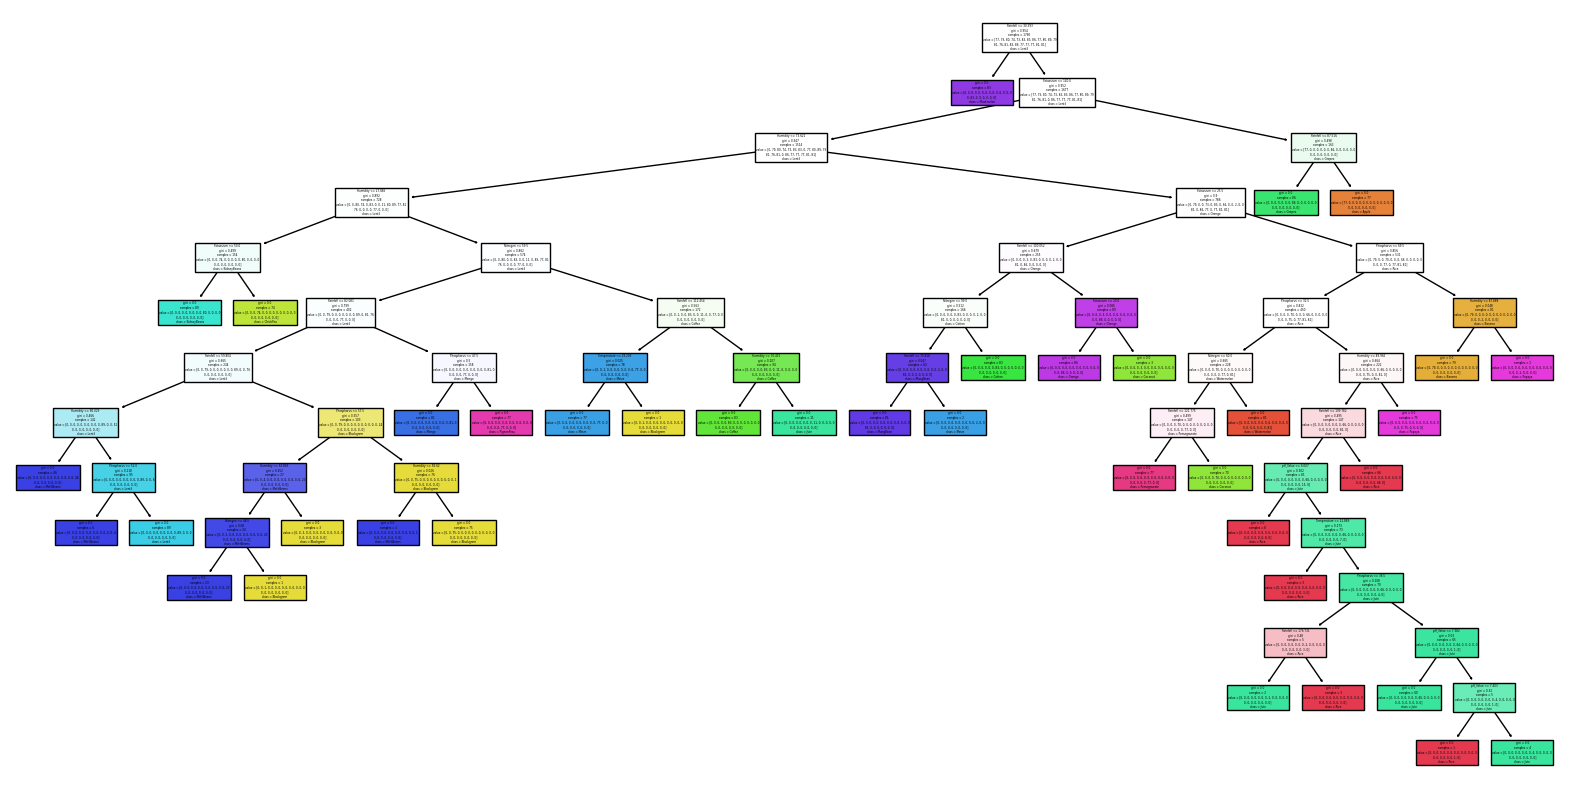

In [11]:
# Visualisasi Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(model, feature_names=X.columns, class_names=[str(i) for i in sorted(y.unique())], filled=True)
plt.show()